# Mini-projet - Elections
*Basé sur Hands-on Data Preprocessing, R. Jafari, 2022*

**Ce TP est noté. Merci de lire attentivement le fichier instructions.pdf avant de commencer**

Nom étudiant 1: **Gombas**

Prénom étudiant 1: **Owen**

Nom étudiant 2: **Darmanger**

Prénom étudiant 2: **David**

## Préambule

### Imports

In [274]:
# packages standards
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from typing import List, Dict, Tuple, Callable, Any
import re

In [275]:
# packages spécifiques
import matplotlib.image as mpimg
import seaborn as sns

### Data

In [276]:
DATA_FOLDER = os.path.join(".", "data")  # chemin relatif et nom du dossier "data"

RAW_FOLDER = os.path.join(
    DATA_FOLDER, "raw"
)  # chemin du dossier raw (ne devrait pas être changé): INPUT

PREPROCESSED_FOLDER = os.path.join(
    DATA_FOLDER, "preprocessed"
)  # chemin du dossier preprocessed (resultat du traitement raw): OUTPUT

MEDIA_FOLDER = os.path.join(
    DATA_FOLDER, "media"
)  # chemin du dossier media pour les illustrations de mise en page des notebooks

EXPLORATION_FOLDER = os.path.join(
    DATA_FOLDER, "exploration"
)  # chemin du dossier exploration pour les notebooks d'exploration

In [277]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
from pandas_profiling import ProfileReport

In [278]:
# dictionnary with filename and header row
files = glob.glob(os.path.join(PREPROCESSED_FOLDER, "*.csv"))
files

['./data/preprocessed/Education.csv',
 './data/preprocessed/PopulationEstimates.csv',
 './data/preprocessed/countypres_2000-2020.csv',
 './data/preprocessed/PovertyEstimates.csv',
 './data/preprocessed/Unemployment.csv']

In [279]:
def read_csv(filename: str) -> pd.DataFrame:
    return pd.read_csv(filename, dtype={"fips": str})

In [280]:
def numeric_df(df: pd.DataFrame) -> pd.DataFrame:
    return df.select_dtypes(include=np.number)

In [281]:
def plot_outliers(df: pd.DataFrame, col, ax):
    sns.boxplot(x=col, data=df, ax=ax)
    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("")

In [282]:
def plot_outliers_all(df: pd.DataFrame, cols: pd.Index, nrows=1, ncols=3):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 20, nrows * 5))
    
    for i, col in enumerate(cols):
        plot_outliers(df, col, axes[i])
        
    plt.show()

Education.csv


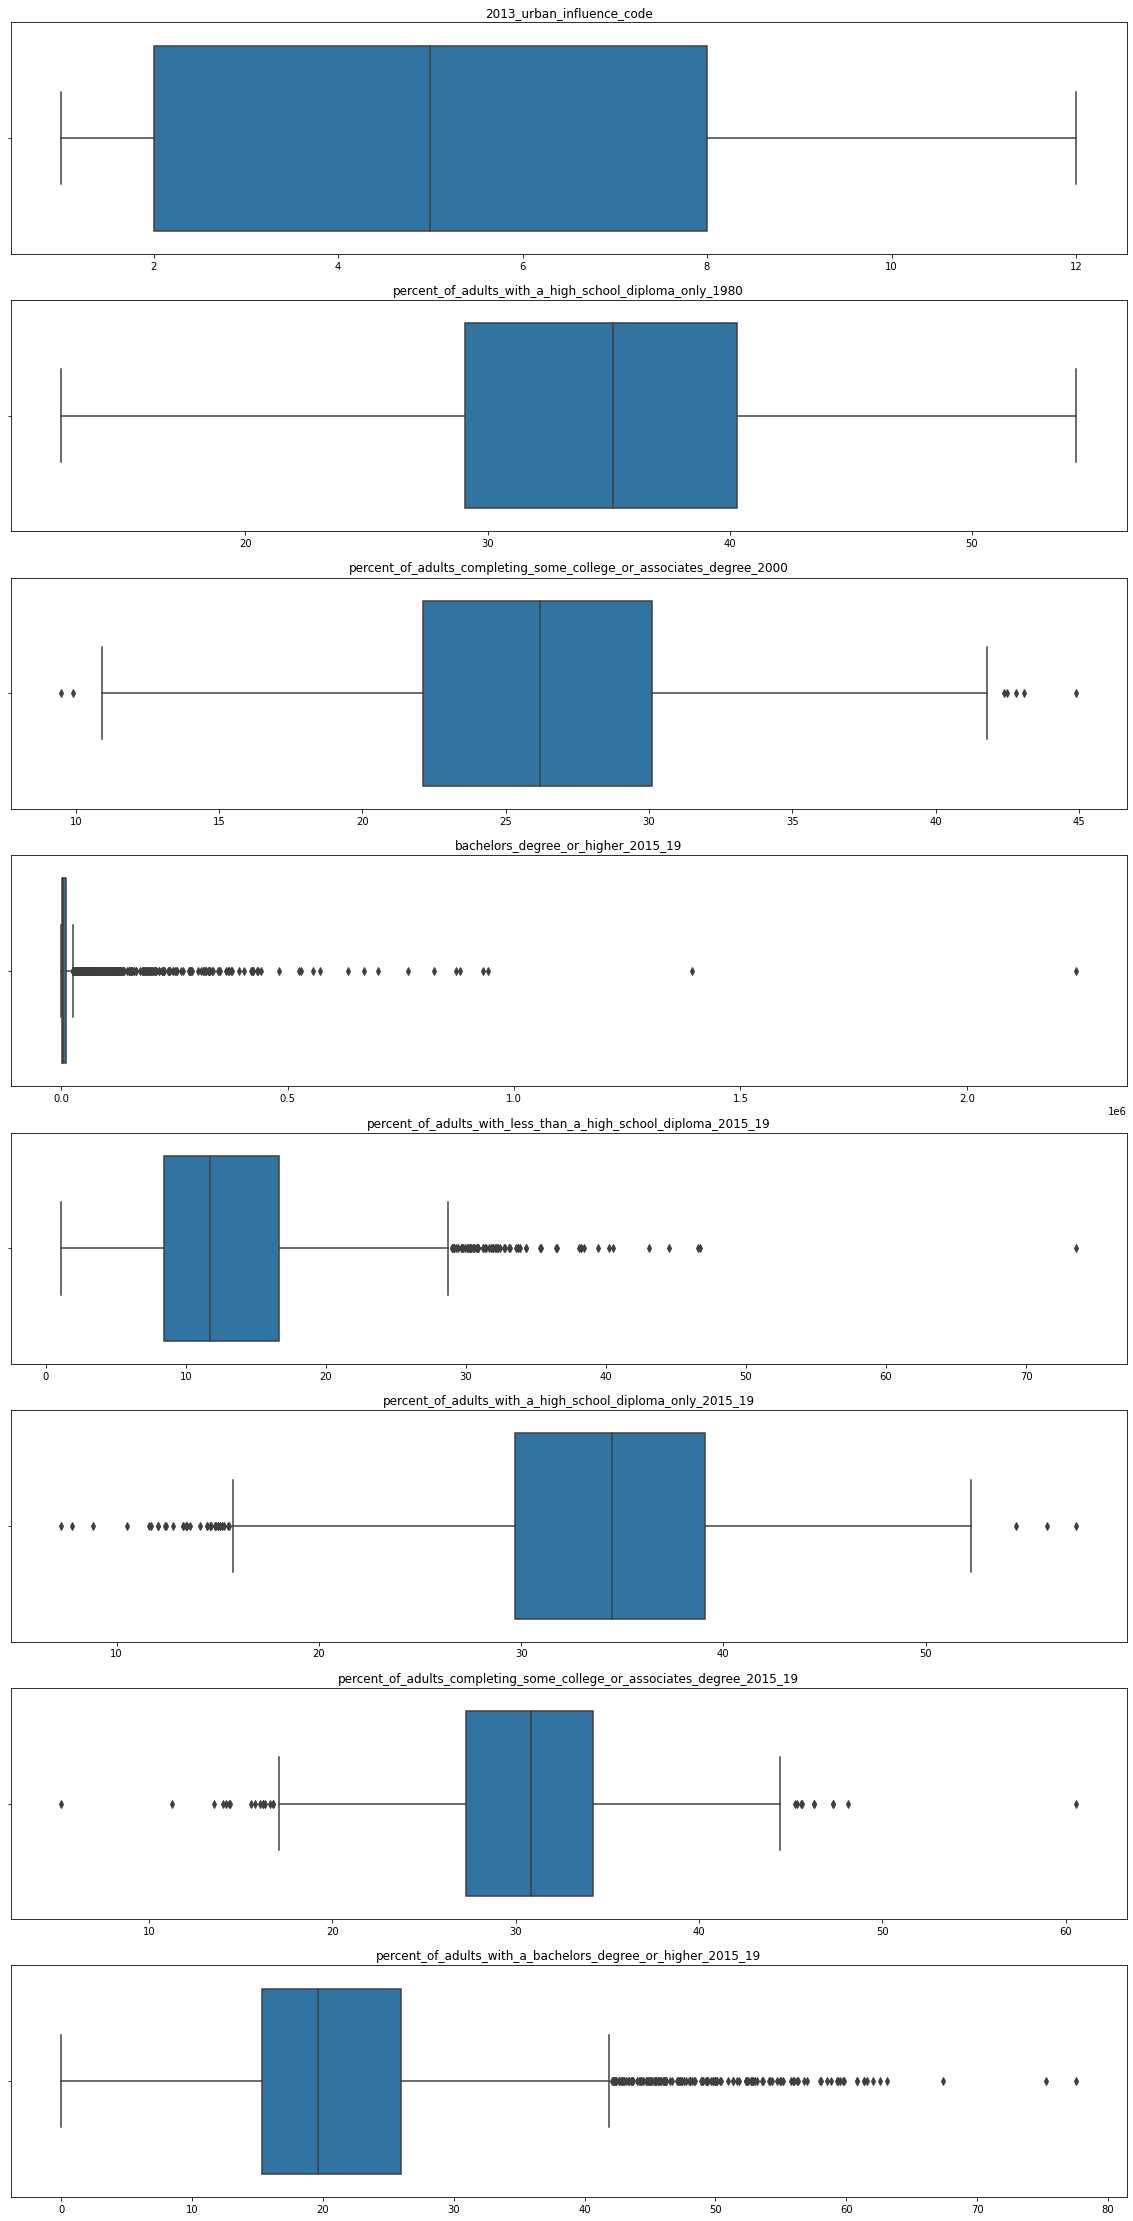

PopulationEstimates.csv


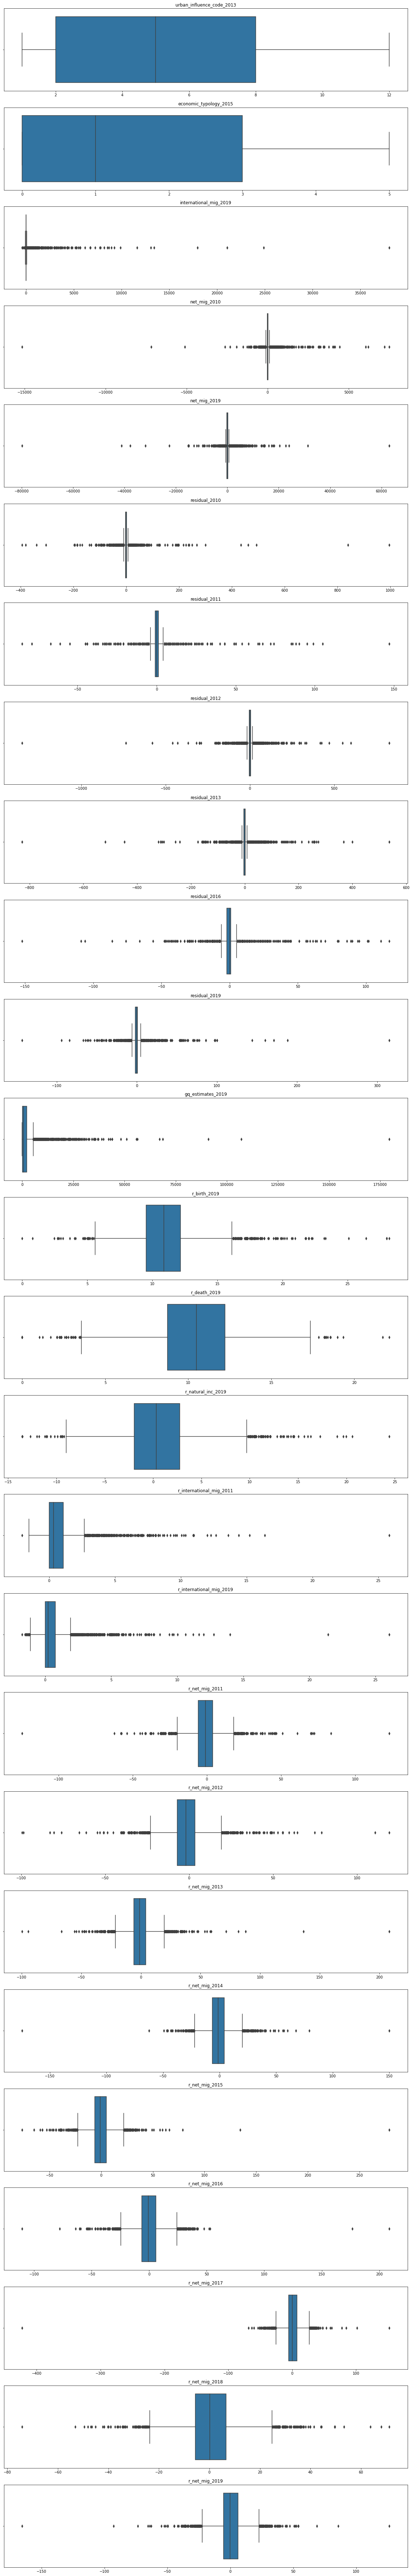

countypres_2000-2020.csv


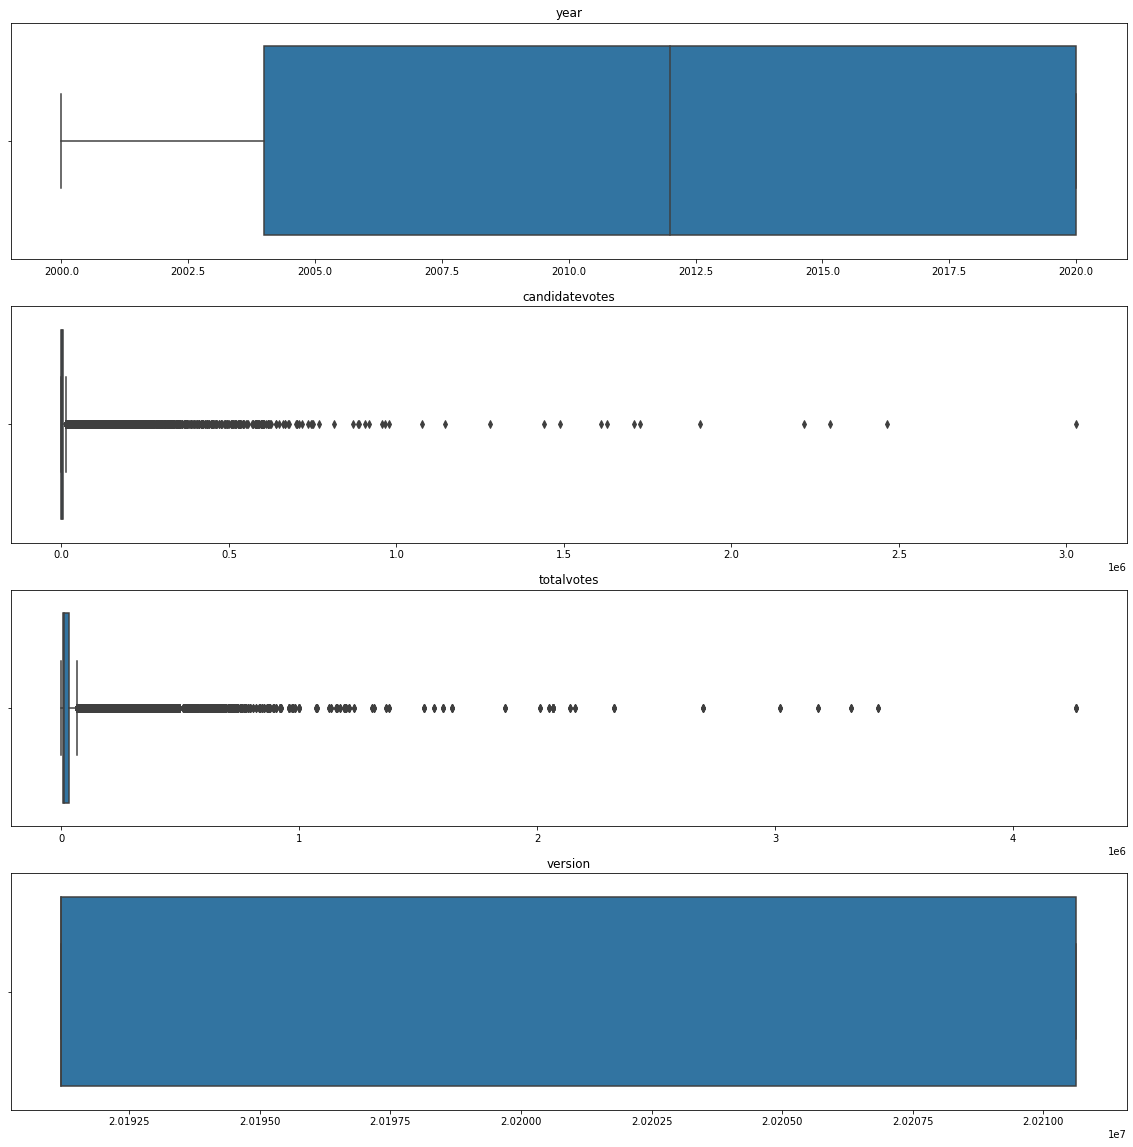

PovertyEstimates.csv


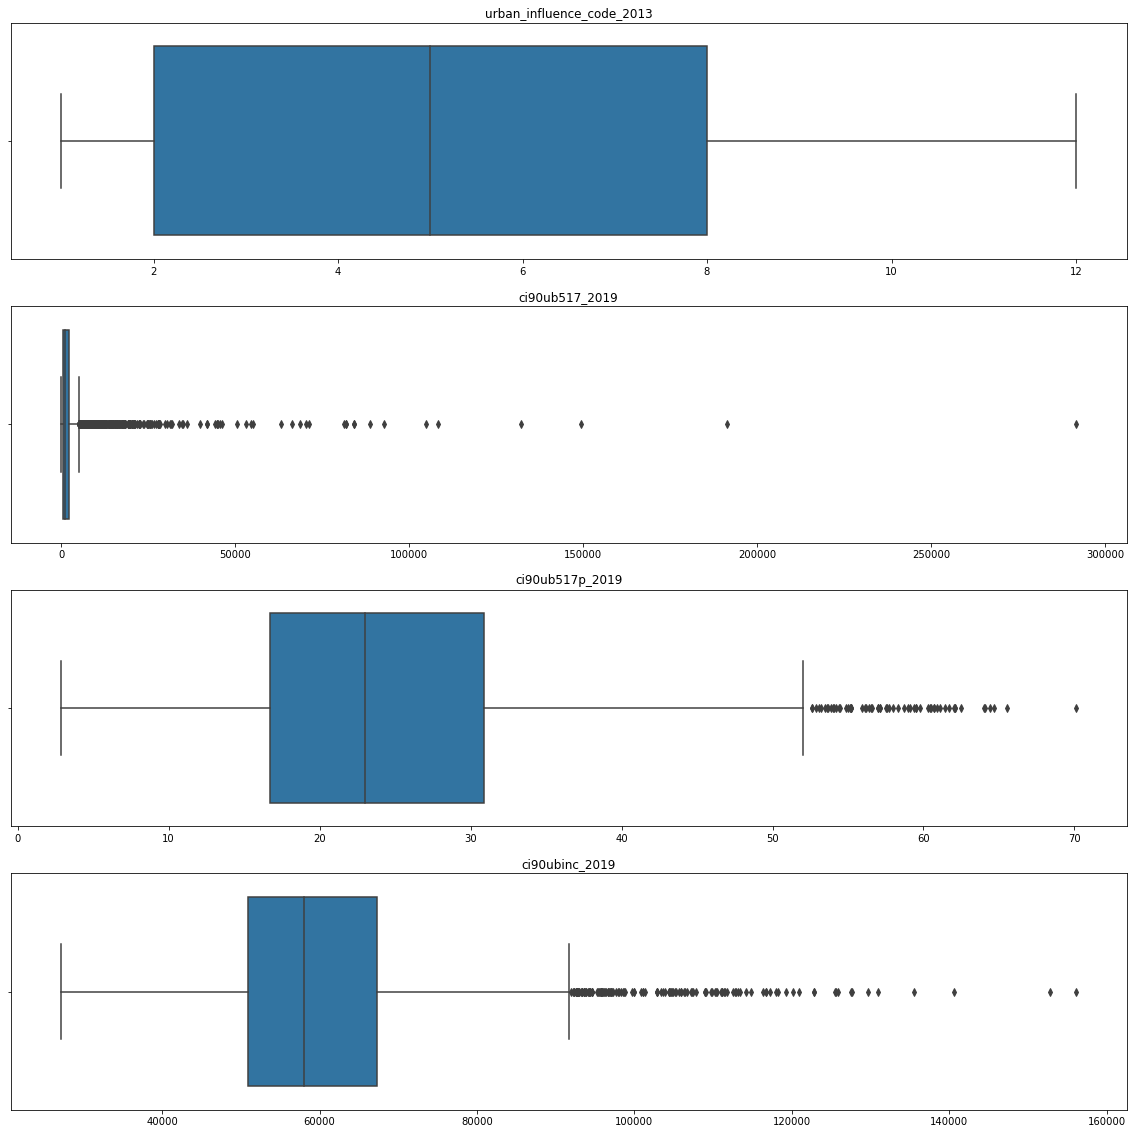

Unemployment.csv


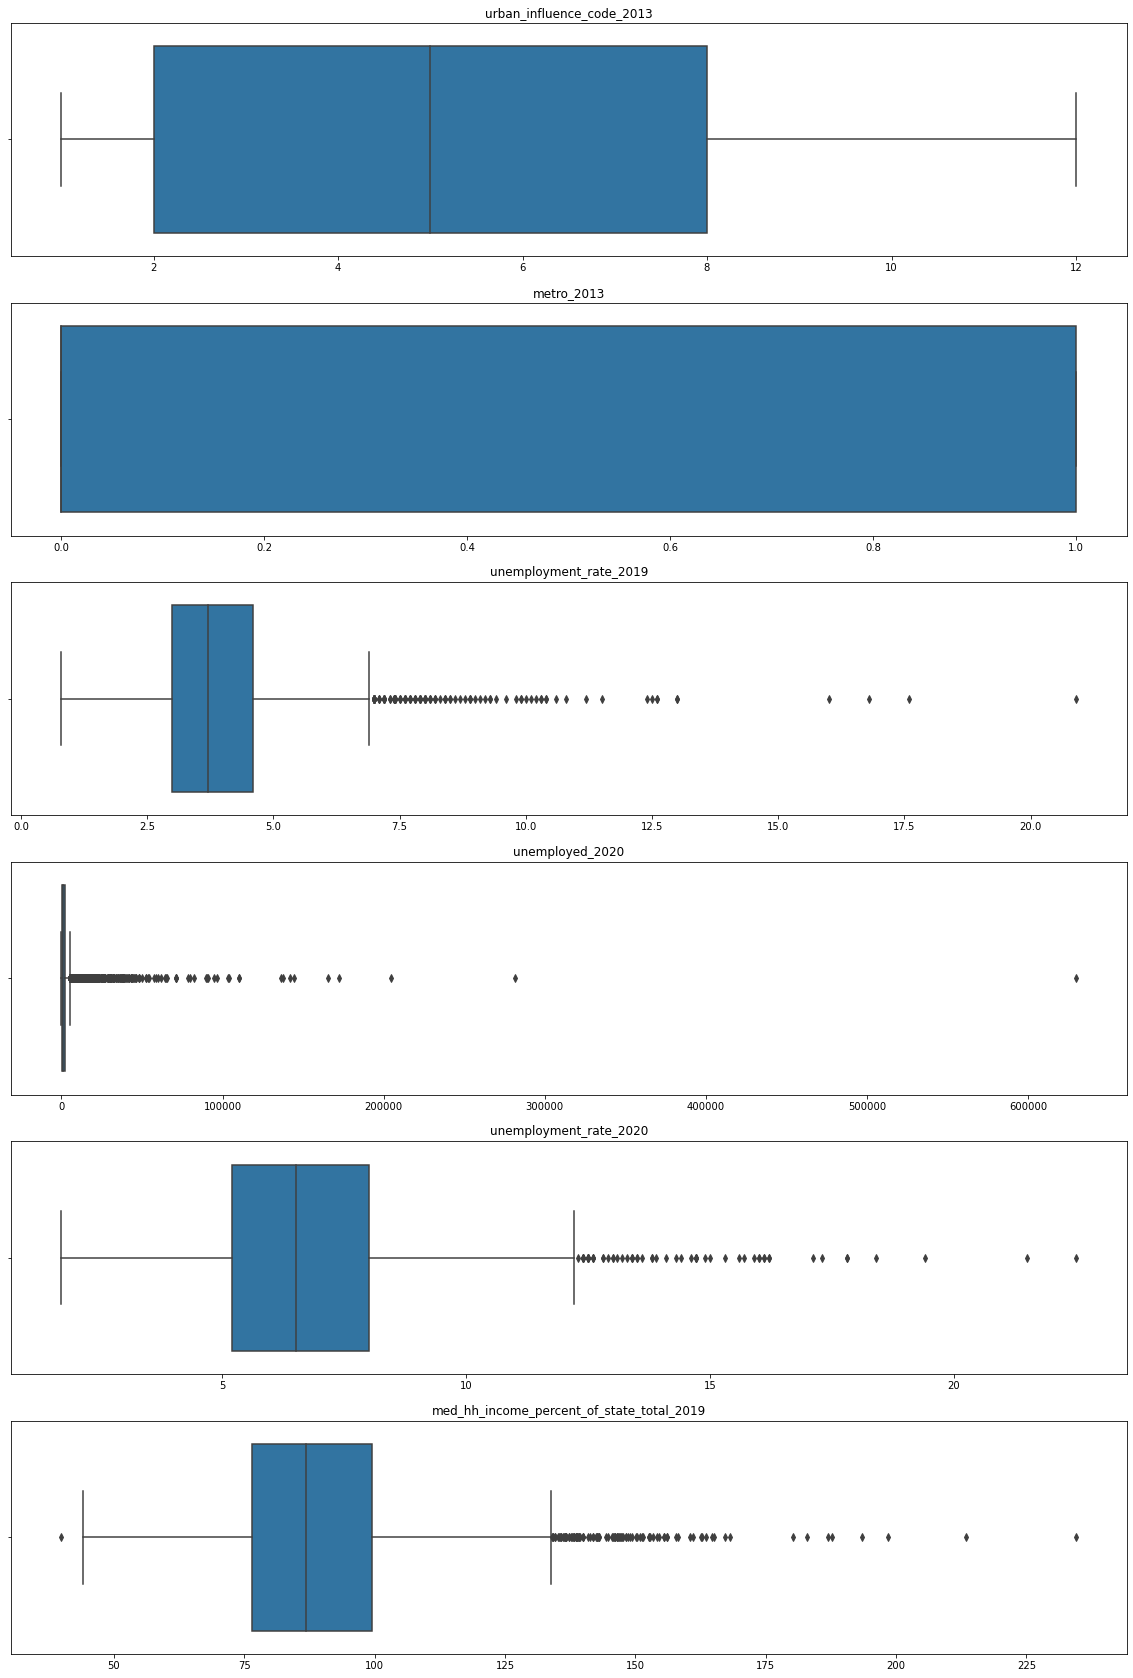

In [283]:
for file in files:
    print(os.path.basename(file))
    df = read_csv(file)
    df = numeric_df(df)

    ncols = 1
    nrows = df.shape[1] // ncols
    plot_outliers_all(df, df.columns, ncols=ncols, nrows=nrows)

In [284]:
def select_numerical_outliers(df: pd.DataFrame, col: str, threshold: float = 1.5) -> pd.DataFrame:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df[(df[col] < q1 - threshold * iqr) | (df[col] > q3 + threshold * iqr)]

In [285]:
def percentage_outliers(df: pd.DataFrame, outliers_df: pd.DataFrame, threshold: float = 1.5) -> float:
    return len(outliers_df) / len(df) * 100

## Outliers analysis

In [286]:
for file in files:
    print(os.path.basename(file))
    df = read_csv(file)
    df = numeric_df(df)
    
    for col in df.columns:
        outliers_df = select_numerical_outliers(df, col)
        print(f"{percentage_outliers(df, outliers_df):.2f}% \t outliers for {col}")

    print()

Education.csv
0.00% 	 outliers for 2013_urban_influence_code
0.00% 	 outliers for percent_of_adults_with_a_high_school_diploma_only_1980
0.22% 	 outliers for percent_of_adults_completing_some_college_or_associates_degree_2000
14.94% 	 outliers for bachelors_degree_or_higher_2015_19
2.13% 	 outliers for percent_of_adults_with_less_than_a_high_school_diploma_2015_19
1.14% 	 outliers for percent_of_adults_with_a_high_school_diploma_only_2015_19
0.82% 	 outliers for percent_of_adults_completing_some_college_or_associates_degree_2015_19
4.66% 	 outliers for percent_of_adults_with_a_bachelors_degree_or_higher_2015_19

PopulationEstimates.csv
0.00% 	 outliers for urban_influence_code_2013
0.00% 	 outliers for economic_typology_2015
16.52% 	 outliers for international_mig_2019
19.76% 	 outliers for net_mig_2010
18.40% 	 outliers for net_mig_2019
18.49% 	 outliers for residual_2010
12.95% 	 outliers for residual_2011
17.00% 	 outliers for residual_2012
20.85% 	 outliers for residual_2013
12.32%